<a href="https://colab.research.google.com/github/jjhiatt/Capstone-II-Josh-Hiatt/blob/main/Capstone_II_Data_Wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#IMPORTING: Importing Modules
!pip install opendatasets
import opendatasets as od
!pip install ydata_profiling
from ydata_profiling import ProfileReport
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno

In [ ]:
#IMPORTING DATA: Kaggle username and key.
 {"username":"joshuahiatt","key":"0e0d379008f0bf32b03c49a253c03b4a"}

In [3]:
#Downloading Kaggle dataset and storing it to a directory.
od.download(
    "https://www.kaggle.com/datasets/cid007/pizza-restaurants-us", force=True
)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: joshuahiatt
Your Kaggle Key: ··········


100%|██████████| 395k/395k [00:00<00:00, 63.0MB/s]

In [4]:
#Accessing the CSV file.
pizza_directory = ('./pizza-restaurants-us/Pizza_Restaurants_and_the_Pizza_They_Sell.csv')

In [5]:
#Reading the CSV File and storing in a dataframe.
pizza = pd.read_csv(pizza_directory)

In [6]:
pizza.head()

,id,address,categories,primaryCategories,city,country,keys,latitude,longitude,menuPageURL,menus.amountMax,menus.amountMin,menus.description,menus.name,name,postalCode,priceRangeMin,priceRangeMax,province
0,AVz3Y-7h3D1zeR_xDAqm,4203 E Kiehl Ave,"Pizza,Restaurant,American restaurants,Pizza Pl...",Accommodation & Food Services,Sherwood,US,us/ar/sherwood/4203ekiehlave/-1051391616,34.832300,-92.183800,http://www.citysearch.com/profile/menu/1550074...,7.98,7.98,NaN,Cheese Pizza,Shotgun Dans Pizza,72120,0,25,AR
1,AVweGPFF_7pvs4fzAAzQ,25 E Camelback Rd,"Pizza,Pizza Place,Restaurants",Accommodation & Food Services,Phoenix,US,us/az/phoenix/25ecamelbackrd/-727422936,33.509266,-112.073044,NaN,6.00,6.00,NaN,Pizza Cookie,Sauce Pizza Wine,85012,0,25,AZ
2,AVwdRGa9_7pvs4fz4E3K,3703 Paxton Ave,"Restaurant,Pizza Place,Restaurants",Accommodation & Food Services,Cincinnati,US,us/oh/cincinnati/3703paxtonave/-619797122,39.144883,-84.432685,http://www.citysearch.com/profile/menu/8160503...,6.49,6.49,a saucelessampcomma double cheese pizza with a...,Pizza Blanca,Mios Pizzeria,45209,0,25,OH
3,AVwdX4psIN2L1WUfvJB1,30495 John R Rd,"Pizza,Carry-out food,Pizza Place,Restaurants",Accommodation & Food Services,Madison Heights,US,us/mi/madisonheights/30495johnrrd/-874863116,42.516669,-83.106630,NaN,5.99,5.99,NaN,Small Pizza,Hungry Howies Pizza,48071,25,40,MI
4,AVwdaeTtkufWRAb55pSH,3600 Eastern Ave,"Pizza,American restaurants,Pizza Place,Pizza e...",Accommodation & Food Services,Baltimore,US,us/md/baltimore/3600easternave/-1270965359,39.286630,-76.566984,NaN,5.49,5.49,NaN,Pizza Sub,Spartan Pizzeria,21224,0,25,MD


In [7]:
#DATATYPES: Checking the data types of the pizza dataframe.
pizza.dtypes

id                    object
address               object
categories            object
primaryCategories     object
city                  object
country               object
keys                  object
latitude             float64
longitude            float64
menuPageURL           object
menus.amountMax      float64
menus.amountMin      float64
menus.description     object
menus.name            object
name                  object
postalCode            object
priceRangeMin          int64
priceRangeMax          int64
province              object
dtype: object

In [8]:
#Tried to convert postalCode to a float but found data with a "-" and followed by four numbers. Only including first five digits and converting the column to a float.
pizza['postalCode'] = pizza['postalCode'].str[:5]
pizza['postalCode'] = pizza['postalCode'].astype('float')

In [9]:
#Want to see how many unique categories there are with menus.name. Changing menus.name to a category and then finding unique values.
pizza['menus.name'] = pizza['menus.name'].astype('category')
print(pizza['menus.name'].unique())

['Cheese Pizza', 'Pizza Cookie', 'Pizza Blanca', 'Small Pizza', 'Pizza Sub', ..., 'Pizza Logs (5)', 'Large Cheese & Pepperoni Pizza & Double Wings', 'Super Steak Pizza', 'Large Cheese & 1 Item Pizza', 'King Arthur's Supreme Pizza']
Length: 4749
Categories (4749, object): ['"Aloha" Pizza (12" Medium)', '"Aloha" Pizza (14" Large)', '"Bro"luxe Pizza',
                            '"Cholesterol Bomb" Pizza', ..., 'ampquotChicagoampquotStyle Pizza Slice',
                            'lb Pizza Burger', 'piesano's Pizzas', 'top Hit Pizzas']


In [10]:
#Changing categories into a category as well.
pizza['categories'] = pizza['categories'].astype('category')
print(pizza['categories'].unique())

['Pizza,Restaurant,American restaurants,Pizza P..., 'Pizza,Pizza Place,Restaurants', 'Restaurant,Pizza Place,Restaurants', 'Pizza,Carry-out food,Pizza Place,Restaurants', 'Pizza,American restaurants,Pizza Place,Pizza ..., ..., 'Pizza Place,Restaurants,Pizza Delivery,Take O..., 'Italian Restaurant,Pizza Place,Italian Restau..., 'Pizza Place,Brewery,American Restaurant,Resta..., 'Pizza Place,Burger Joint,Pizza Place and Burg..., 'Pizza Place,Restaurant,Fast Food,Pizza']
Length: 456
Categories (456, object): ['American Restaurant,American Restaurant and P..., 'American Restaurant,Pizza Place',
                           'American Restaurant,Pizza Place and American ..., 'American Restaurant,Pizza Place,American Rest...,
                           ..., 'Wings Joint,Pizza Place,Pizza Place and Wings...,
                           'restaurant,Pizza Place', 'wholesale,Pizza Place', 'wich Place,Pizza Place']


In [11]:
#Too many variations with categories and menus.name and will convert data types back to objects.
pizza['categories'] = pizza['categories'].astype('object')
pizza['menus.name'] = pizza['menus.name'].astype('object')

<Axes: xlabel='menus.name', ylabel='menus.amountMax'>

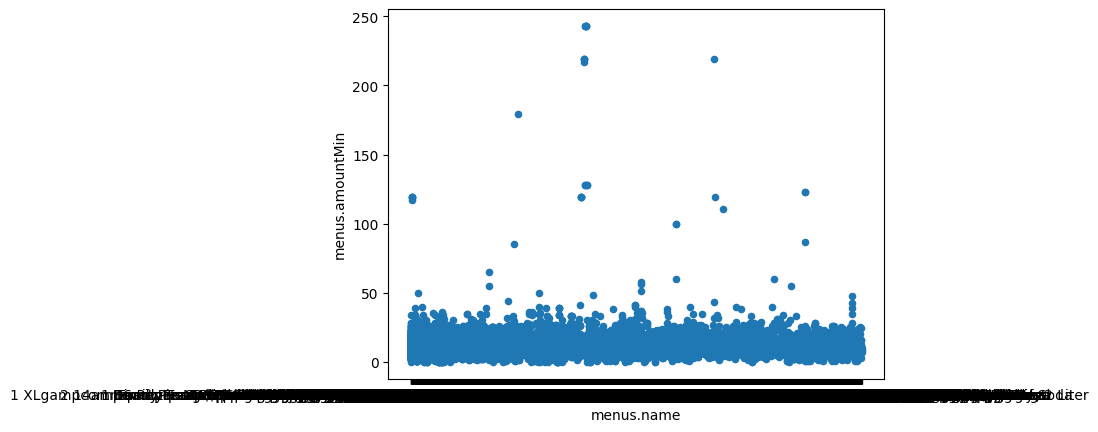

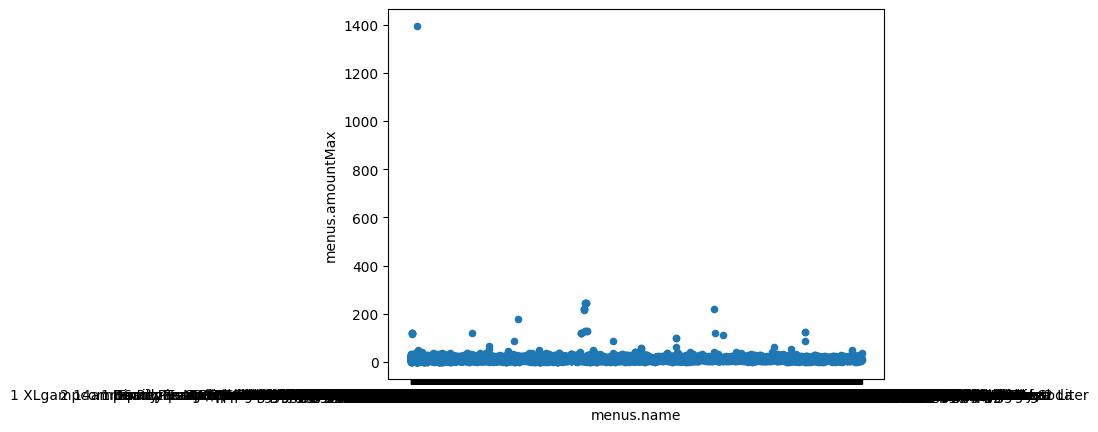

In [12]:
#RANGES: Look at scatterplot of menus.amountMin and menus.amountMax to determine if there are any outliers.
pizza.plot(x='menus.name', y='menus.amountMin', kind='scatter')
pizza.plot(x='menus.name', y='menus.amountMax', kind='scatter')

In [13]:
#Going to filter out any menu items from the data fram that are over $50 as that is where the majority of the data exists with few exceptions.
pizza = pizza[pizza['menus.amountMin'] <= 50.00]
pizza = pizza[pizza['menus.amountMax'] <= 50.00]

<Axes: xlabel='menus.name', ylabel='menus.amountMax'>

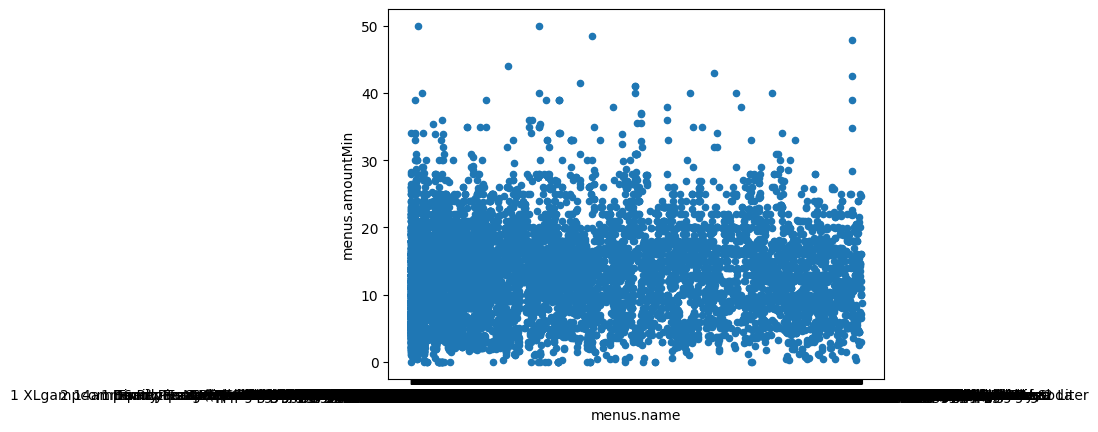

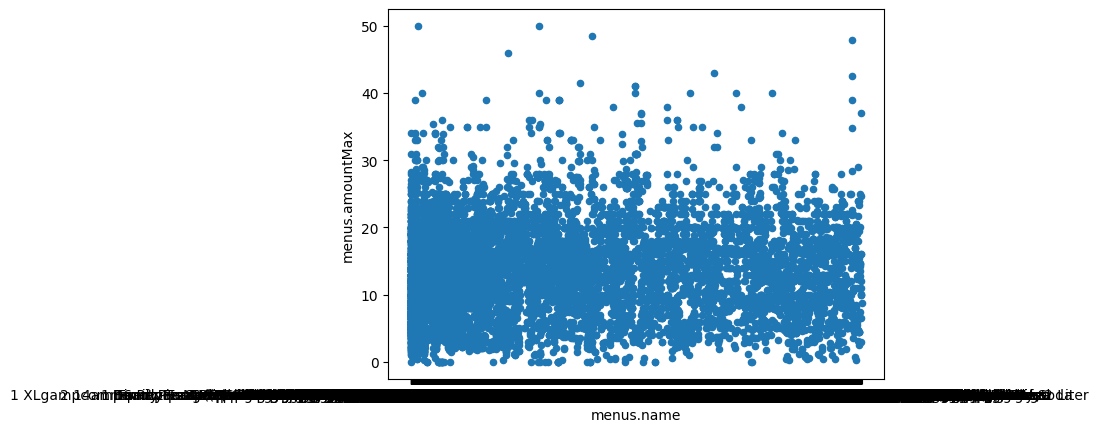

In [42]:
#Confirming dataframe has been filtered to $50.00 or below price points.
pizza.plot(x='menus.name', y='menus.amountMin', kind='scatter')
pizza.plot(x='menus.name', y='menus.amountMax', kind='scatter')

In [ ]:
#DUPLICATES: Finding and removing duplicates. No Duplicates found just differing menu items at the same restaurant.
duplicates = pizza.duplicated()
pizza[duplicates]

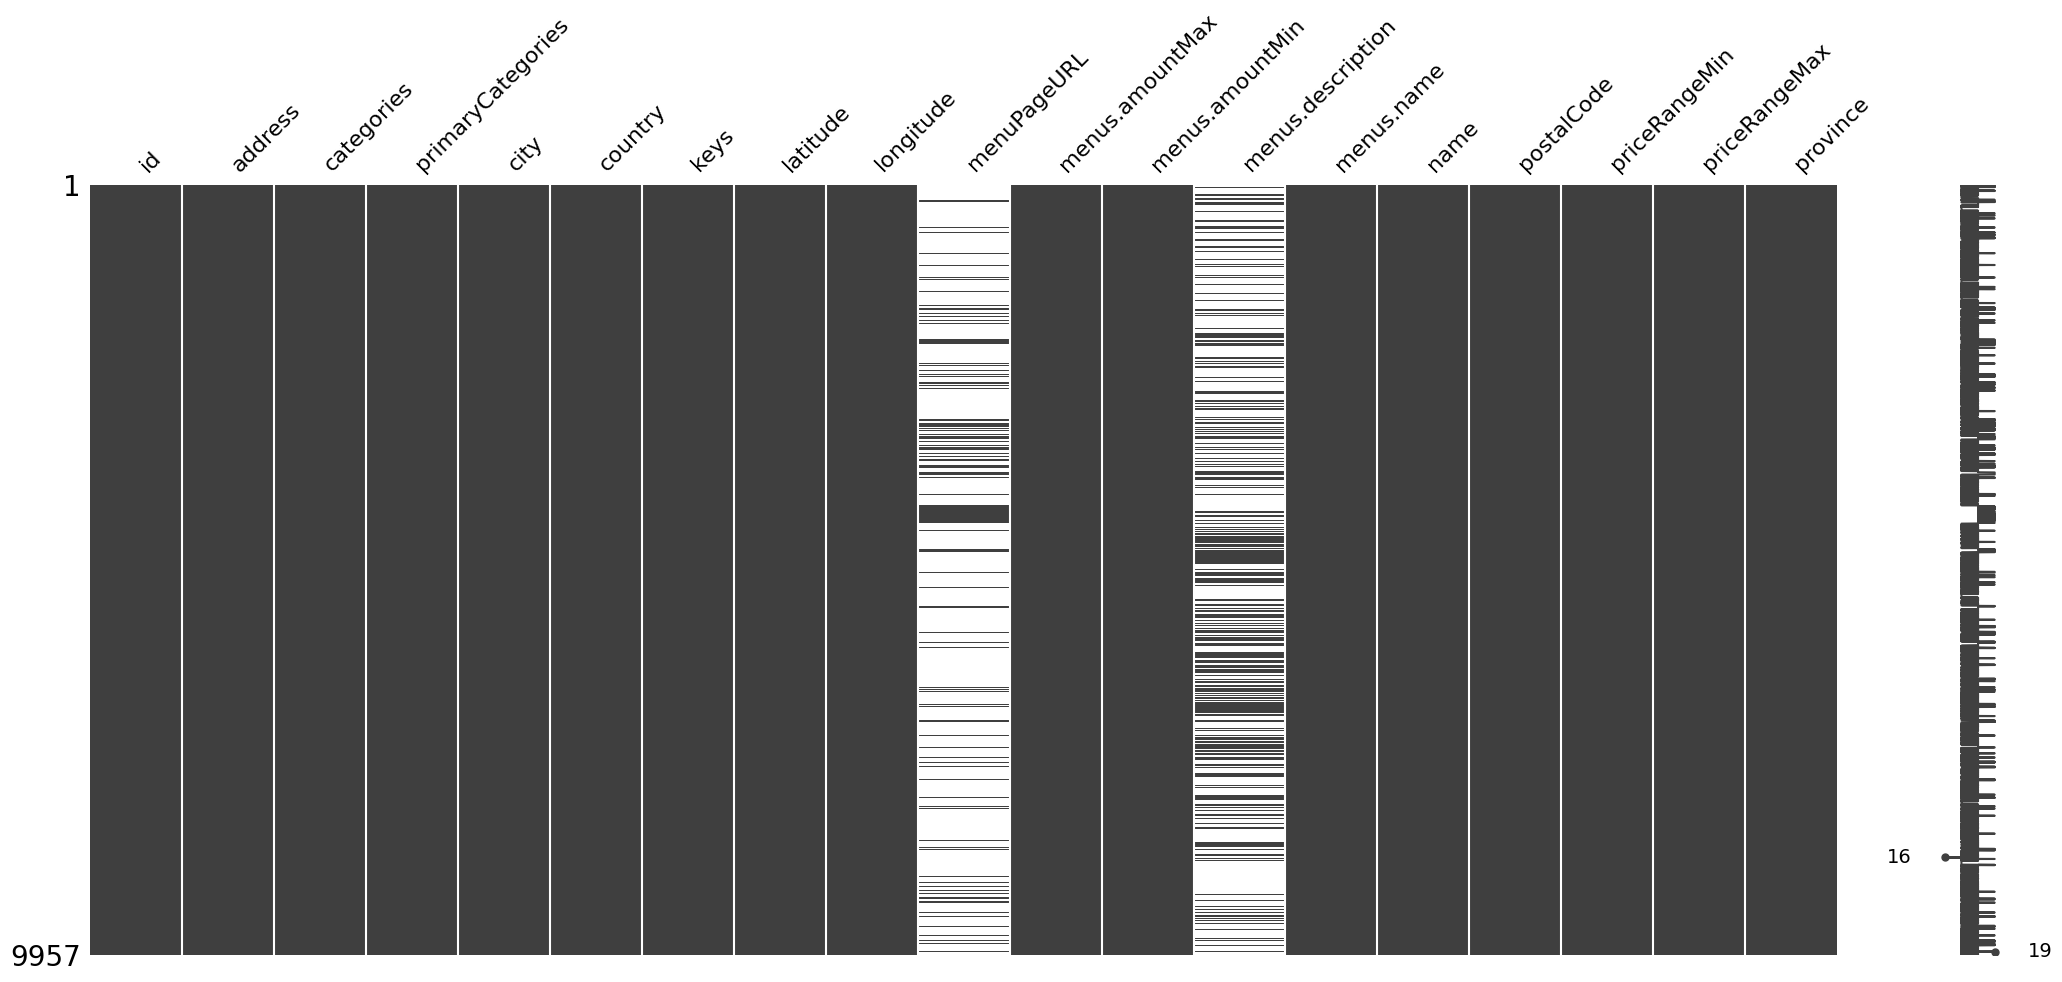

In [15]:
#COMPLETENESS: Visualizing Missing data from dataframe. Lot of missing data in two columns that can be dropped.
msno.matrix(pizza)
plt.show()

In [16]:
#Delete Columns with many missing data entries.
pizza_cleansed = pizza.drop(columns=['menuPageURL', 'menus.description'])

In [17]:
pizza_cleansed.head()

,id,address,categories,primaryCategories,city,country,keys,latitude,longitude,menus.amountMax,menus.amountMin,menus.name,name,postalCode,priceRangeMin,priceRangeMax,province
0,AVz3Y-7h3D1zeR_xDAqm,4203 E Kiehl Ave,"Pizza,Restaurant,American restaurants,Pizza Pl...",Accommodation & Food Services,Sherwood,US,us/ar/sherwood/4203ekiehlave/-1051391616,34.832300,-92.183800,7.98,7.98,Cheese Pizza,Shotgun Dans Pizza,72120.0,0,25,AR
1,AVweGPFF_7pvs4fzAAzQ,25 E Camelback Rd,"Pizza,Pizza Place,Restaurants",Accommodation & Food Services,Phoenix,US,us/az/phoenix/25ecamelbackrd/-727422936,33.509266,-112.073044,6.00,6.00,Pizza Cookie,Sauce Pizza Wine,85012.0,0,25,AZ
2,AVwdRGa9_7pvs4fz4E3K,3703 Paxton Ave,"Restaurant,Pizza Place,Restaurants",Accommodation & Food Services,Cincinnati,US,us/oh/cincinnati/3703paxtonave/-619797122,39.144883,-84.432685,6.49,6.49,Pizza Blanca,Mios Pizzeria,45209.0,0,25,OH
3,AVwdX4psIN2L1WUfvJB1,30495 John R Rd,"Pizza,Carry-out food,Pizza Place,Restaurants",Accommodation & Food Services,Madison Heights,US,us/mi/madisonheights/30495johnrrd/-874863116,42.516669,-83.106630,5.99,5.99,Small Pizza,Hungry Howies Pizza,48071.0,25,40,MI
4,AVwdaeTtkufWRAb55pSH,3600 Eastern Ave,"Pizza,American restaurants,Pizza Place,Pizza e...",Accommodation & Food Services,Baltimore,US,us/md/baltimore/3600easternave/-1270965359,39.286630,-76.566984,5.49,5.49,Pizza Sub,Spartan Pizzeria,21224.0,0,25,MD


In [18]:
pizza_cleansed.describe()

,latitude,longitude,menus.amountMax,menus.amountMin,postalCode,priceRangeMin,priceRangeMax
count,9957.000000,9957.000000,9957.000000,9957.000000,9953.000000,9957.000000,9957.000000
mean,38.383490,-90.001489,13.392404,12.928641,45982.296494,4.610324,27.736969
std,4.570434,17.306015,6.634503,6.428751,31856.542133,9.792596,5.996853
min,21.421326,-157.802443,0.000000,0.000000,6801.000000,0.000000,7.000000
25%,34.597916,-103.279960,8.490000,8.000000,14218.000000,0.000000,25.000000
50%,40.123125,-82.898020,13.250000,12.950000,34695.000000,0.000000,25.000000
75%,40.905048,-75.192900,17.950000,16.950000,79902.000000,0.000000,25.000000
max,64.850500,-71.946170,49.990000,49.990000,99701.000000,50.000000,55.000000


In [19]:
pizza_cleansed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9957 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 9957 non-null   object 
 1   address            9957 non-null   object 
 2   categories         9957 non-null   object 
 3   primaryCategories  9957 non-null   object 
 4   city               9957 non-null   object 
 5   country            9957 non-null   object 
 6   keys               9957 non-null   object 
 7   latitude           9957 non-null   float64
 8   longitude          9957 non-null   float64
 9   menus.amountMax    9957 non-null   float64
 10  menus.amountMin    9957 non-null   float64
 11  menus.name         9957 non-null   object 
 12  name               9957 non-null   object 
 13  postalCode         9953 non-null   float64
 14  priceRangeMin      9957 non-null   int64  
 15  priceRangeMax      9957 non-null   int64  
 16  province           9957 

In [20]:
#IMPORTING DATA: Importing CO State Population data.
CO_City_url = 'https://en.wikipedia.org/wiki/List_of_municipalities_in_Colorado'
CO_City = pd.read_html(CO_City_url)

In [21]:
#Setting the index of the City data frame.
len(CO_City)

11

In [22]:
CO_City = CO_City[2]

In [23]:
CO_City.head()

Municipality[1] Type of government[1] County[1][b][c] Population[3]        \
  Municipality[1] Type of government[1] County[1][b][c]          2020  2010   
0         Aguilar        Statutory town      Las Animas           456   538   
1          Akron†        Statutory town      Washington          1757  1702   
2        Alamosa†        Home rule city         Alamosa          9806  8780   
3            Alma        Statutory town            Park           296   270   
4        Antonito        Statutory town         Conejos           647   781   

                 2020 land area[6] 2020 population density[3][6]  \
    Change       2020 land area[6] 2020 population density[3][6]   
0  −15.24%   0.392 sq mi 1.016 km2            1162/sq mi 449/km2   
1   +3.23%   2.772 sq mi 7.180 km2             634/sq mi 245/km2   
2  +11.69%  7.598 sq mi 19.679 km2            1291/sq mi 498/km2   
3   +9.63%   0.434 sq mi 1.123 km2             683/sq mi 264/km2   
4  −17.16%   0.427 sq mi 1.105 km2            1516/sq mi 586/km2   

  Date of incorporation[1]                                  Coordinates[6][d]  
  Date of incorporation[1]                                  Coordinates[6][d]  
0         January 10, 1894  .mw-parser-output .geo-default,.mw-parser-outp...  
1       September 22, 1887    40°09′49″N 103°13′13″W﻿ / ﻿40.1635°N 103.2203°W  
2          August 12, 1878    37°28′31″N 105°52′37″W﻿ / ﻿37.4752°N 105.8770°W  
3         December 2, 1873    39°17′09″N 106°04′01″W﻿ / ﻿39.2859°N 106.0670°W  
4        December 29, 1889    37°04′34″N 106°00′37″W﻿ / ﻿37.0762°N 106.0103°W

In [24]:
#COLUMNS: Naming and grabbing only columns needed.
CO_City_sub = CO_City.iloc[:, [0,2,3,6,7,9]].copy()
CO_City_sub.columns = ['city', 'county','population','land_area','pop_density','coordinates']

In [25]:
CO_Cities = CO_City_sub
CO_Cities.head()

,city,county,population,land_area,pop_density,coordinates
0,Aguilar,Las Animas,456,0.392 sq mi 1.016 km2,1162/sq mi 449/km2,".mw-parser-output .geo-default,.mw-parser-outp..."
1,Akron†,Washington,1757,2.772 sq mi 7.180 km2,634/sq mi 245/km2,40°09′49″N 103°13′13″W﻿ / ﻿40.1635°N 103.2203°W
2,Alamosa†,Alamosa,9806,7.598 sq mi 19.679 km2,1291/sq mi 498/km2,37°28′31″N 105°52′37″W﻿ / ﻿37.4752°N 105.8770°W
3,Alma,Park,296,0.434 sq mi 1.123 km2,683/sq mi 264/km2,39°17′09″N 106°04′01″W﻿ / ﻿39.2859°N 106.0670°W
4,Antonito,Conejos,647,0.427 sq mi 1.105 km2,1516/sq mi 586/km2,37°04′34″N 106°00′37″W﻿ / ﻿37.0762°N 106.0103°W


In [26]:
#CLEANING TEXT DATA: Removing Special characters after the city name.
CO_Cities['city'] = CO_Cities['city'].str.split('[').str.get(0)
CO_Cities['city'] = CO_Cities['city'].str.split('†').str.get(0)

In [27]:
#DATA TYPES: Inspect Data types of new dataframe.
CO_Cities.dtypes

city           object
county         object
population      int64
land_area      object
pop_density    object
coordinates    object
dtype: object

<Axes: xlabel='city', ylabel='population'>

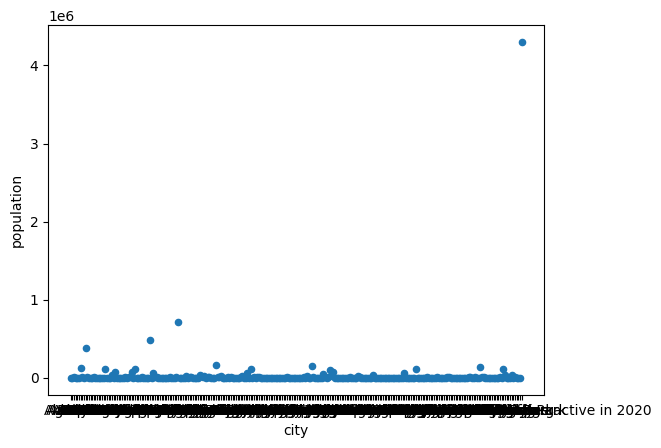

In [98]:
#RANGES: Inspecting Population Ranges of dataframe populations.
CO_Cities.plot(x='city', y='population', kind='scatter')

In [28]:
#Filtering out the line that has over 4M population which is the grand total line of the entire chart.
CO_Cities_Cleansed = CO_Cities[CO_Cities['population'] <= 1000000]

<Axes: xlabel='city', ylabel='population'>

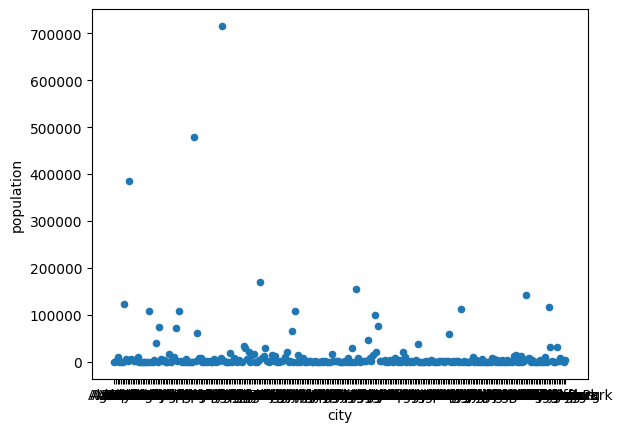

In [100]:
#Validating total was removed.
CO_Cities_Cleansed.plot(x='city', y='population', kind='scatter')

In [29]:
#DUPLICATES: Finding and removing duplicates. No Duplicates found.
duplicates2 = CO_Cities_Cleansed.duplicated()
CO_Cities_Cleansed[duplicates2]

,city,county,population,land_area,pop_density,coordinates


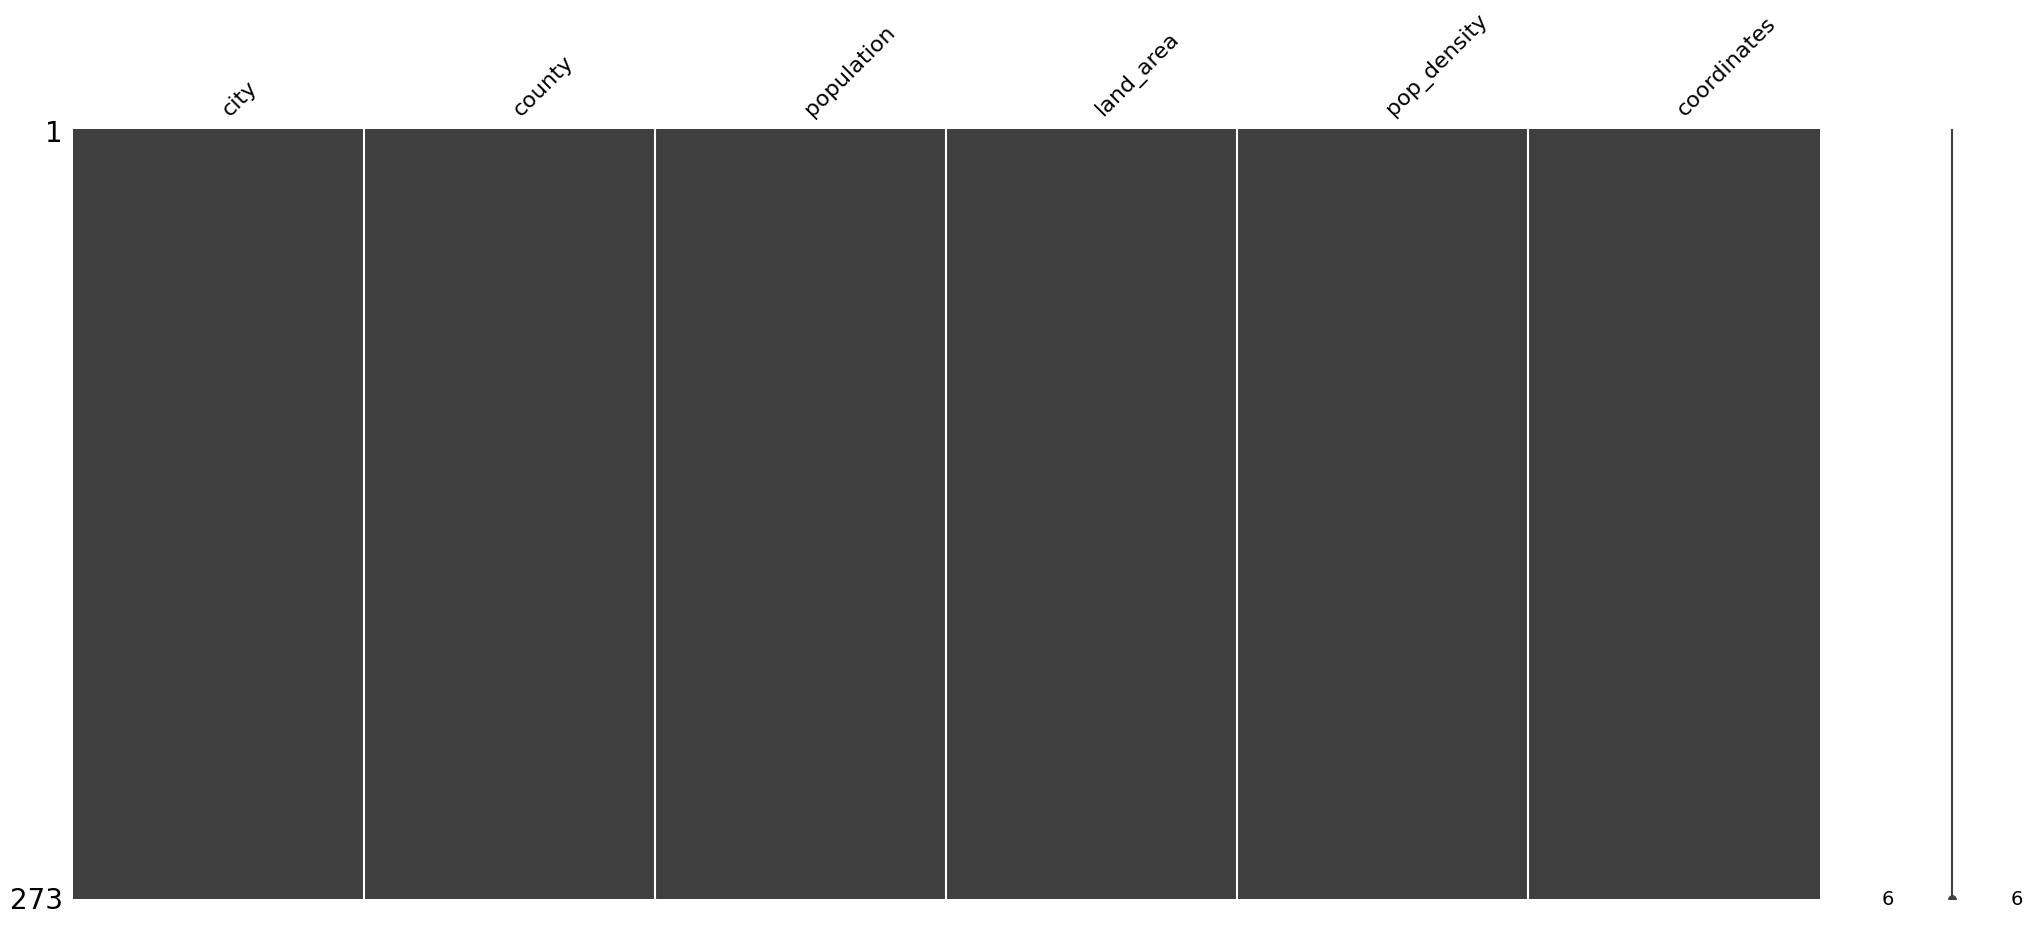

In [30]:
#COMPLETENESS: Visualizing Missing data from dataframe.
msno.matrix(CO_Cities_Cleansed)
plt.show()

In [31]:
CO_Cities_Cleansed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 273 entries, 0 to 272
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   city         273 non-null    object
 1   county       273 non-null    object
 2   population   273 non-null    int64 
 3   land_area    273 non-null    object
 4   pop_density  273 non-null    object
 5   coordinates  273 non-null    object
dtypes: int64(1), object(5)
memory usage: 14.9+ KB


In [32]:
CO_Cities_Cleansed.describe()

,population
count,273.000000
mean,15755.717949
std,61520.207696
min,0.000000
25%,410.000000
50%,1264.000000
75%,6442.000000
max,715522.000000


In [36]:
#MERGING: Joining the pizza_cleansed dataframe with the CO_Cities_Cleansed dataframe.
Pizza_Cities = pizza_cleansed.merge(CO_Cities_Cleansed, on='city', how='outer')

In [37]:
CO_Pizza_Cities = Pizza_Cities.loc[CO_Pizza_Cities['province'] == 'CO']

In [43]:
CO_Pizza_Cities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 1217 to 8859
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 138 non-null    object 
 1   address            138 non-null    object 
 2   categories         138 non-null    object 
 3   primaryCategories  138 non-null    object 
 4   city               138 non-null    object 
 5   country            138 non-null    object 
 6   keys               138 non-null    object 
 7   latitude           138 non-null    float64
 8   longitude          138 non-null    float64
 9   menus.amountMax    138 non-null    float64
 10  menus.amountMin    138 non-null    float64
 11  menus.name         138 non-null    object 
 12  name               138 non-null    object 
 13  postalCode         138 non-null    float64
 14  priceRangeMin      138 non-null    float64
 15  priceRangeMax      138 non-null    float64
 16  province           138

In [41]:
CO_Pizza_Cities.describe()

,latitude,longitude,menus.amountMax,menus.amountMin,postalCode,priceRangeMin,priceRangeMax,population
count,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000,138.000000
mean,39.604109,-105.219874,12.260580,12.002971,80445.456522,4.717391,27.818841,182793.565217
std,0.670430,0.596950,4.874438,4.610953,384.662657,9.808375,5.891024,212845.065351
min,37.267960,-107.881522,0.850000,0.850000,80013.000000,0.000000,24.000000,1571.000000
25%,39.535558,-105.261194,9.500000,9.500000,80202.000000,0.000000,25.000000,45652.000000
50%,39.736949,-105.097303,12.000000,12.000000,80301.000000,0.000000,25.000000,108250.000000
75%,40.035269,-104.924182,15.500000,15.190000,80525.750000,0.000000,25.000000,169810.000000
max,40.588845,-104.716324,24.000000,23.990000,81601.000000,25.000000,40.000000,715522.000000


In [42]:
CO_Pizza_Cities.head(20)

,id,address,categories,primaryCategories,city,country,keys,latitude,longitude,menus.amountMax,...,name,postalCode,priceRangeMin,priceRangeMax,province,county,population,land_area,pop_density,coordinates
1217,AVweELF0ByjofQCxu91y,550 Grant St,"Pizza,Restaurant,Pizza Place",Accommodation & Food Services,Denver,US,us/co/denver/550grantst/273941150,39.725069,-104.983255,19.99,...,Cosmos Pizza,80203.0,0.0,25.0,CO,Denver[ae],715522.0,153.075 sq mi 396.463 km2,"4674/sq mi 1,805/km2",39°45′43″N 104°52′34″W﻿ / ﻿39.7620°N 104.8760°W
1218,AVweELF0ByjofQCxu91y,550 Grant St,"Pizza,Restaurant,Pizza Place",Accommodation & Food Services,Denver,US,us/co/denver/550grantst/273941150,39.725069,-104.983255,11.99,...,Cosmos Pizza,80203.0,0.0,25.0,CO,Denver[ae],715522.0,153.075 sq mi 396.463 km2,"4674/sq mi 1,805/km2",39°45′43″N 104°52′34″W﻿ / ﻿39.7620°N 104.8760°W
1219,AWEXJZGwIxWefVJwxl1f,2401 15th St,Pizza Place,Accommodation & Food Services,Denver,US,us/co/denver/240115thst/658733715,39.756797,-105.008937,8.00,...,Protos PizzaDenver,80202.0,25.0,40.0,CO,Denver[ae],715522.0,153.075 sq mi 396.463 km2,"4674/sq mi 1,805/km2",39°45′43″N 104°52′34″W﻿ / ﻿39.7620°N 104.8760°W
1220,AVwcvsasByjofQCxhtzV,44 S Broadway,"Pizza,American Restaurants,Restaurant,Pizza Re...",Accommodation & Food Services,Denver,US,us/co/denver/44sbroadway/-576257972,39.715726,-104.987188,9.98,...,Pie Hole,80209.0,1.0,24.0,CO,Denver[ae],715522.0,153.075 sq mi 396.463 km2,"4674/sq mi 1,805/km2",39°45′43″N 104°52′34″W﻿ / ﻿39.7620°N 104.8760°W
1221,AVwdYnY5IN2L1WUfvQGs,2041 S University Blvd,"Restaurant,Pizza Place",Accommodation & Food Services,Denver,US,us/co/denver/2041suniversityblvd/-1336431197,39.679472,-104.959610,14.00,...,ZaZas Pizzeria,80210.0,0.0,25.0,CO,Denver[ae],715522.0,153.075 sq mi 396.463 km2,"4674/sq mi 1,805/km2",39°45′43″N 104°52′34″W﻿ / ﻿39.7620°N 104.8760°W
1222,AVwdYnY5IN2L1WUfvQGs,2041 S University Blvd,"Restaurant,Pizza Place",Accommodation & Food Services,Denver,US,us/co/denver/2041suniversityblvd/-1336431197,39.679472,-104.959610,23.99,...,ZaZas Pizzeria,80210.0,0.0,25.0,CO,Denver[ae],715522.0,153.075 sq mi 396.463 km2,"4674/sq mi 1,805/km2",39°45′43″N 104°52′34″W﻿ / ﻿39.7620°N 104.8760°W
1223,AVwd25zP_7pvs4fz94Yr,2401 15th St,"Restaurant,Pizza Place,Pizza Place Highland",Accommodation & Food Services,Denver,US,us/co/denver/240115thst/-1180959340,39.756755,-105.009659,8.00,...,Proto's Pizzeria Napoletana,80202.0,25.0,40.0,CO,Denver[ae],715522.0,153.075 sq mi 396.463 km2,"4674/sq mi 1,805/km2",39°45′43″N 104°52′34″W﻿ / ﻿39.7620°N 104.8760°W
1224,AVwd25zP_7pvs4fz94Yr,2401 15th St,"Restaurant,Pizza Place,Pizza Place Highland",Accommodation & Food Services,Denver,US,us/co/denver/240115thst/-1180959340,39.756755,-105.009659,8.00,...,Proto's Pizzeria Napoletana,80202.0,25.0,40.0,CO,Denver[ae],715522.0,153.075 sq mi 396.463 km2,"4674/sq mi 1,805/km2",39°45′43″N 104°52′34″W﻿ / ﻿39.7620°N 104.8760°W
1225,AVwdY6YU_7pvs4fz5YC6,2553 S Colorado Blvd,Pizza Place,Accommodation & Food Services,Denver,US,us/co/denver/2553scoloradoblvd/-1011626954,39.670606,-104.941363,10.95,...,The Garlic Knot,80222.0,0.0,25.0,CO,Denver[ae],715522.0,153.075 sq mi 396.463 km2,"4674/sq mi 1,805/km2",39°45′43″N 104°52′34″W﻿ / ﻿39.7620°N 104.8760°W
1226,AVwdY6YU_7pvs4fz5YC6,2553 S Colorado Blvd,Pizza Place,Accommodation & Food Services,Denver,US,us/co/denver/2553scoloradoblvd/-1011626954,39.670606,-104.941363,4.75,...,The Garlic Knot,80222.0,0.0,25.0,CO,Denver[ae],715522.0,153.075 sq mi 396.463 km2,"4674/sq mi 1,805/km2",39°45′43″N 104°52′34″W﻿ / ﻿39.7620°N 104.8760°W
